# KNN

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("Zoo.csv")
df.head() 

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


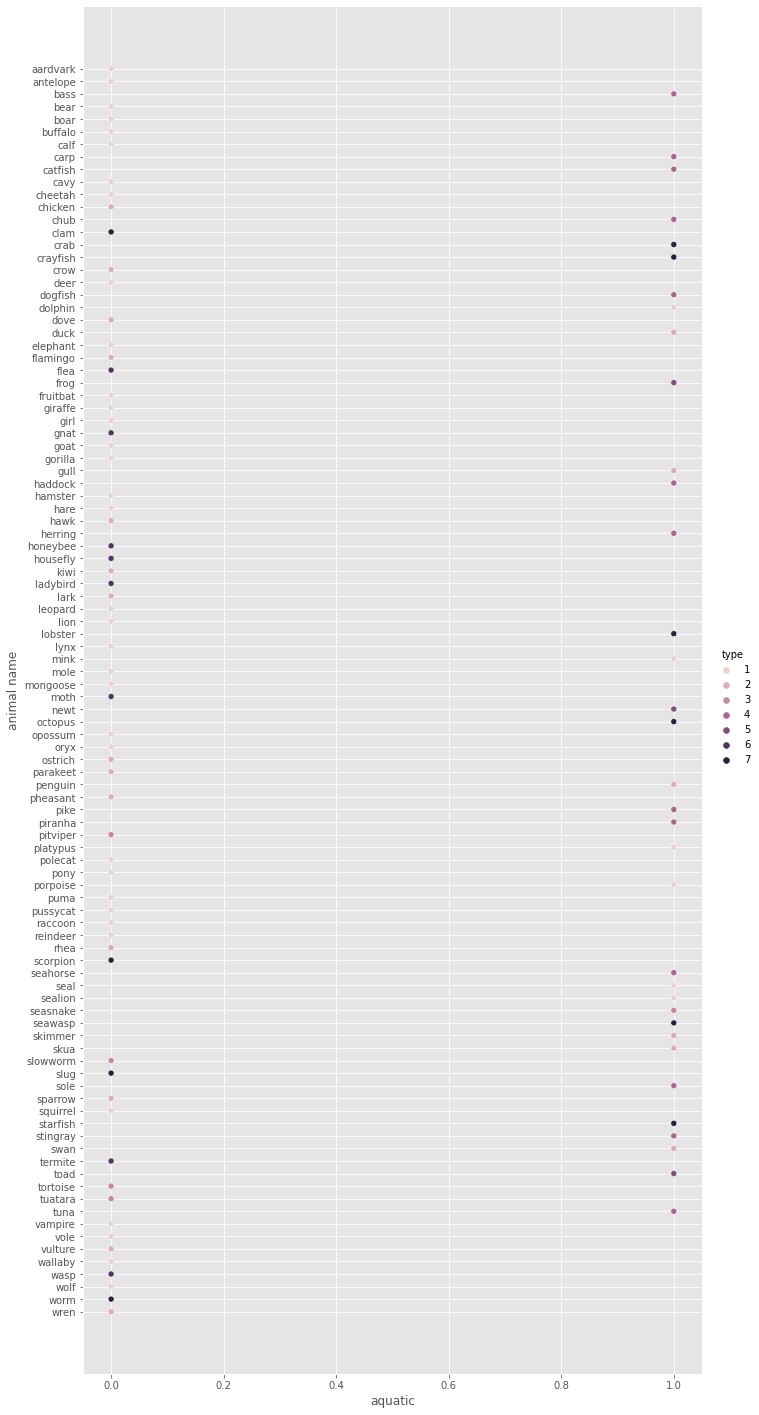

In [6]:
sns.pairplot(data=df,x_vars="aquatic",y_vars="animal name",hue="type",height=20,aspect=0.5);

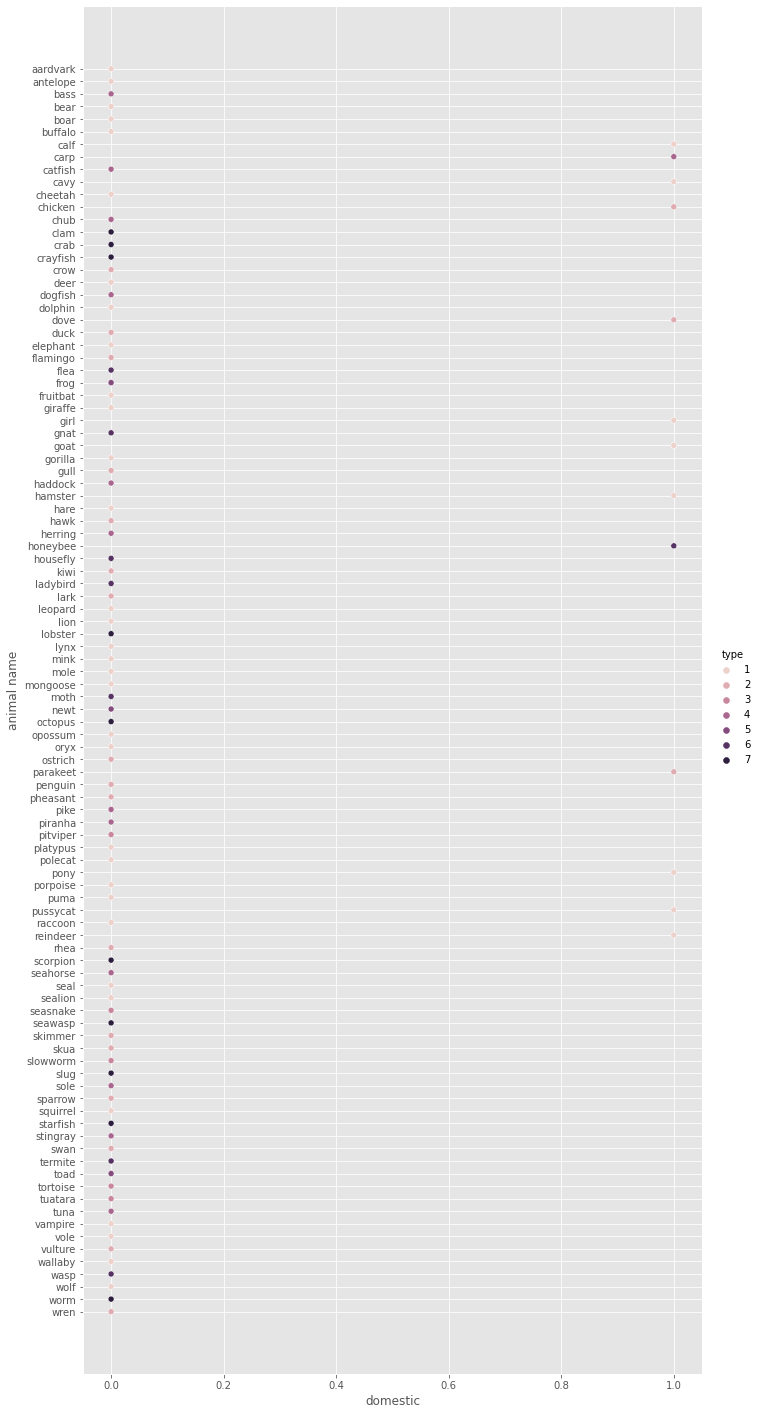

In [7]:
sns.pairplot(data=df,x_vars="domestic",y_vars="animal name",hue="type",height=20,aspect=0.5);

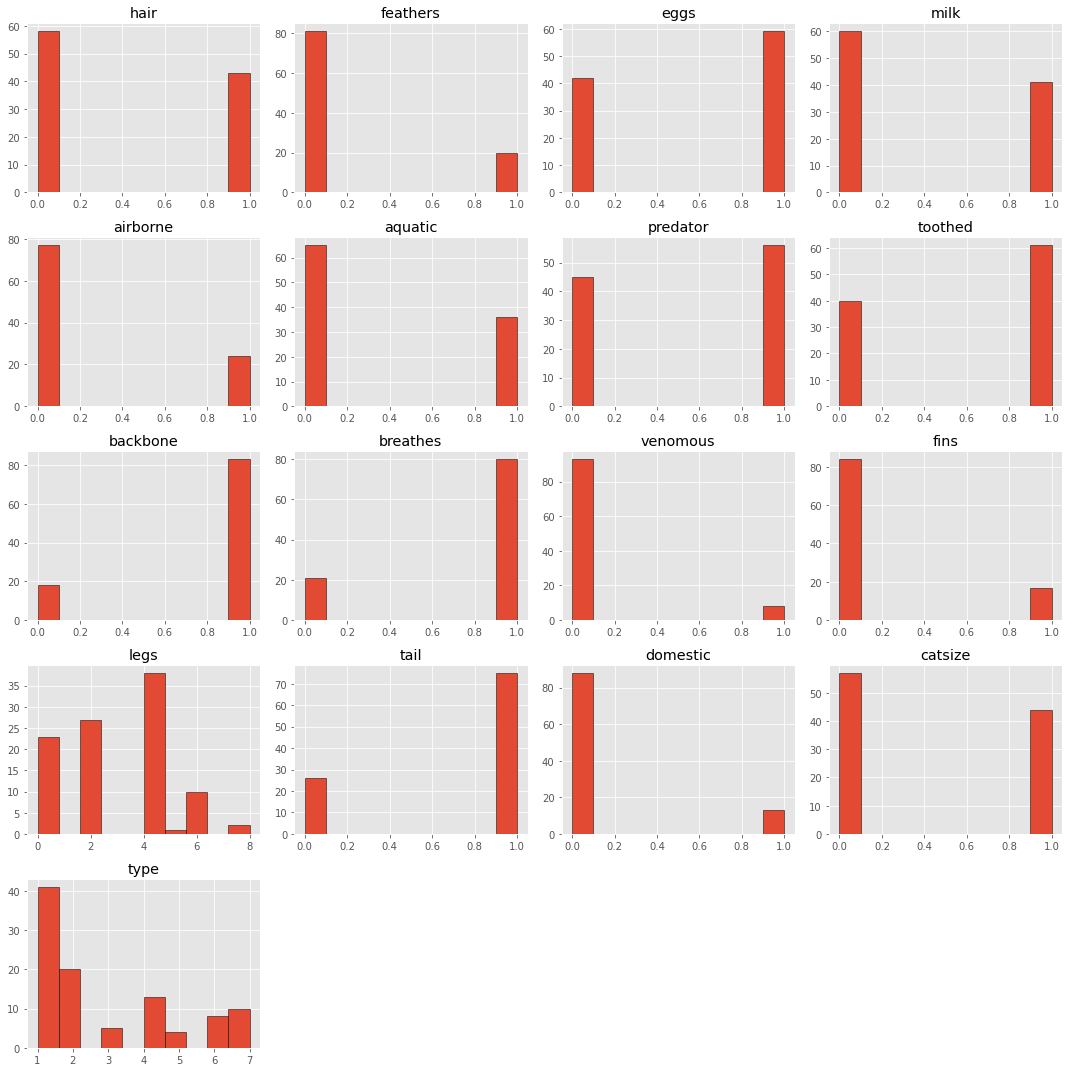

In [8]:
df.hist(edgecolor='k',figsize=(15,15))
plt.tight_layout();

## One Hot Encoding

In [9]:
# one hot encoding for animals column

df=pd.get_dummies(data=df,drop_first=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal name_tuatara,animal name_tuna,animal name_vampire,animal name_vole,animal name_vulture,animal name_wallaby,animal name_wasp,animal name_wolf,animal name_worm,animal name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# separate features which are independent and target

x=df.drop("type",axis=1)
y=df["type"]

In [11]:
# train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
# create a KFOLD Object with 10 splits (Cross validation to compare the performance of the model for different value of K)

from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,shuffle=True,random_state=42)


## HyperParameter Tuning Using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,31,2)
params={"n_neighbors":k_range}

knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,params,cv=kfold,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31, 2)}, scoring='accuracy')

In [14]:
grid_search.best_params_

{'n_neighbors': 1}

In [15]:
from sklearn.model_selection import cross_val_score

knn_best=KNeighborsClassifier(n_neighbors=1)
scores=cross_val_score(knn_best,x_train,y_train,cv=kfold,scoring="accuracy")
scores
scores.mean()

0.975

## Visualizing Grid search


In [16]:
scores_cv=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=kfold,scoring="accuracy")
    scores_cv.append(scores.mean())

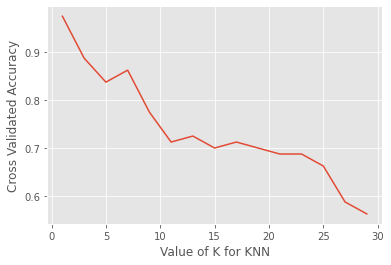

In [17]:
plt.plot(k_range,scores_cv)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy");

##  Model building and predicting as per the evaluated accuracy score and best K-neighbors  possible from the above GridSearchCV

In [18]:
knn_best=KNeighborsClassifier(n_neighbors=1)
knn_best.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred_test=knn_best.predict(x_test)
pred_train=knn_best.predict(x_train)
pred_test,pred_train

(array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3],
       dtype=int64),
 array([5, 5, 6, 1, 7, 6, 7, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
        2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
        1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5,
        2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6], dtype=int64))

In [20]:
from sklearn.metrics import accuracy_score

accuracy_test=accuracy_score(y_test,pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
accuracy_train,accuracy_test

(1.0, 1.0)